# Analyze Results from Evaluation Quickstart

This notebook analyzes the results of the evaluation quickstart.

## Setup

First, we need to import our libraries:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Data Import and Preparation

LensKit puts its output in a `csv` file:

In [3]:
results = pd.read_csv('./build/eval-results.csv')

In [4]:
res_part1 = pd.read_csv('./eval-results-en100k-sweep-part1.csv')
res_part2 = pd.read_csv('./eval-results-en100k-sweep-part2.csv')
results = res_part1.append(res_part2)

In [7]:
results.to_csv('./eval-results-en100k-sweep.csv',index=False)

In [4]:
results

,DataSet,Partition,Algorithm,Succeeded,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,nDCG,MRR,Precision,Recall,F1
0,crossfold,3,Popular,Y,0.230,0.367,2.891528,2.945462,0.112415,0.197987,0.039418,0.157672,0.063069
1,crossfold,3,funkSVD,Y,68.467,0.604,0.954780,1.024123,0.025076,0.035604,0.010847,0.043386,0.017354
2,crossfold,3,PF,Y,570.069,0.436,2.758249,2.840394,0.259946,0.409376,0.091799,0.367196,0.146878
3,crossfold,5,Popular,Y,0.097,0.179,2.957382,3.007693,0.125657,0.200991,0.046277,0.185106,0.074043
4,crossfold,5,funkSVD,Y,65.542,0.194,0.943041,1.022488,0.036689,0.058093,0.013298,0.053191,0.021277
5,crossfold,5,PF,Y,570.708,0.284,2.763889,2.865633,0.274095,0.408275,0.093617,0.374468,0.149787
6,crossfold,1,Popular,Y,0.044,0.101,2.892584,2.956827,0.116993,0.191662,0.044974,0.179894,0.071958
7,crossfold,1,funkSVD,Y,67.917,0.497,0.991478,1.066333,0.033193,0.048069,0.012963,0.051852,0.020741
8,crossfold,1,PF,Y,575.506,0.174,2.764581,2.859769,0.254884,0.392360,0.087831,0.351323,0.140529
9,crossfold,2,Popular,Y,0.046,0.087,2.837284,2.900980,0.116265,0.184958,0.048148,0.192593,0.077037


We ran each algorithm 5 times since we used 5-fold cross-validation.  What we want to do next is compute the average value of each metric for each data set.

In [1]:
# agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','lambda','Beta']).mean()
# agg_results

In [5]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm']).mean()
agg_results

,BuildTime,TestTime,RMSE.ByUser,RMSE.ByRating,nDCG,MRR,Precision,Recall,F1
Algorithm,,,,,,,,,
PF,570.2598,0.2382,2.758628,2.851650,0.256671,0.386133,0.090827,0.363310,0.145324
Popular,0.1174,0.1654,2.897144,2.953223,0.117454,0.194531,0.044487,0.177947,0.071179
funkSVD,65.8114,0.3370,0.961403,1.030917,0.027064,0.041512,0.010498,0.041994,0.016797


In [6]:
agg_results = results.drop(['Partition'], axis=1).groupby(['Algorithm','FeatureCount']).mean()
agg_results

BuildTime  TestTime  RMSE.ByUser  RMSE.ByRating  \
Algorithm FeatureCount                                                     
FunkSVD   25.0              9.6006    9.6910     4.211172       8.515212   
          30.0             10.4586    9.9360     4.188143       8.503824   
          35.0             12.2592   10.7742     4.168428       8.493971   
          40.0             13.8638   11.1812     4.151211       8.485276   
          45.0             15.7364   10.0792     4.135948       8.477486   
          50.0             17.3240   10.7718     4.122263       8.470425   
          60.0             20.9616   10.8554     4.098651       8.458021   
          70.0             24.6948   11.6610     4.079037       8.447431   
          80.0             28.6920   10.8278     4.062748       8.438361   
          90.0             33.5218   14.2000     4.049473       8.430742   
          100.0            41.4064    8.0214     4.039014       8.424614   
          120.0            34.7760    9.3678     4.027308       8.416193   
          140.0            41.0596    9.2686     4.017982       8.408577   
          160.0            48.1486    6.2532     4.009833       8.400156   
          180.0            52.7890    4.7516     4.005757       8.393747   
          200.0            58.8348    4.0552     4.005568       8.389982   
          225.0            65.6662    4.6406     4.008874       8.387656   
          250.0            72.8638    4.3824     4.014608       8.386948   
PF        25.0           7598.9234    2.4774     4.304767       8.554781   
          30.0           8647.0492    2.4178     4.302437       8.552506   
          35.0           9507.7540    1.8908     4.302173       8.552861   
          40.0          10253.0632    1.7728     4.299990       8.551074   
          45.0          10890.8606    1.0542     4.297978       8.549954   
          50.0          11493.9376    0.8938     4.296900       8.549926   
          60.0          12598.6302    0.9002     4.291562       8.547361   
          70.0          13645.2784    0.8942     4.288177       8.544655   
          80.0          14628.8216    1.0258     4.280950       8.540201   
          90.0          15590.5504    0.8568     4.276935       8.539234   
          100.0         16537.2088    0.8764     4.263339       8.530466   
          120.0         14738.5306    1.9648     4.250332       8.524116   
          140.0         16934.0178    1.5802     4.234516       8.517541   
          160.0         19013.7902    1.5086     4.234262       8.519204   
          180.0         21035.2552    1.7242     4.237683       8.520423   
          200.0         23013.6504    1.6410     4.222804       8.513786   
          225.0         25371.6778    1.7542     4.215825       8.510247   
          250.0         27725.4728    1.7478     4.214566       8.510569   

                             MRR  Precision    Recall        F1  
Algorithm FeatureCount                                           
FunkSVD   25.0          0.013970   0.004212  0.004212  0.004212  
          30.0          0.014285   0.004310  0.004310  0.004310  
          35.0          0.014261   0.004188  0.004188  0.004188  
          40.0          0.013707   0.004065  0.004065  0.004065  
          45.0          0.013582   0.003894  0.003894  0.003894  
          50.0          0.013901   0.003820  0.003820  0.003820  
          60.0          0.013748   0.003869  0.003869  0.003869  
          70.0          0.012719   0.003869  0.003869  0.003869  
          80.0          0.011942   0.003551  0.003551  0.003551  
          90.0          0.011915   0.003355  0.003355  0.003355  
          100.0         0.000000   0.000000  0.000000  0.000000  
          120.0         0.012835   0.003502  0.003502  0.003502  
          140.0         0.020960   0.005019  0.005019  0.005019  
          160.0         0.022356   0.005803  0.005803  0.005803  
          180.0         0.025471   0.006145  0.006145  0.006145  
          200.

In [3]:
# res_slim = results.loc[results['lambda'].notnull(), :]

In [2]:
# res_slim.boxplot(['RMSE.ByUser'], ['lambda','Beta','Algorithm'], figsize=(10, 8))

## Plotting Results

Let's start plotting things. What's the RMSE achieved by each algorithm?

In [4]:
# df = results.loc[results['lambda'].notnull(),['lambda', 'RMSE.ByUser']].groupby('lambda').mean()
# df.plot.scatter(x=df['lambda'], y=df['RMSE.ByUser'])

In [5]:
# ax = df.reset_index().plot.scatter(y='RMSE.ByUser', x='lambda')
# df.plot(ax=ax)

## RMSE.ByUser

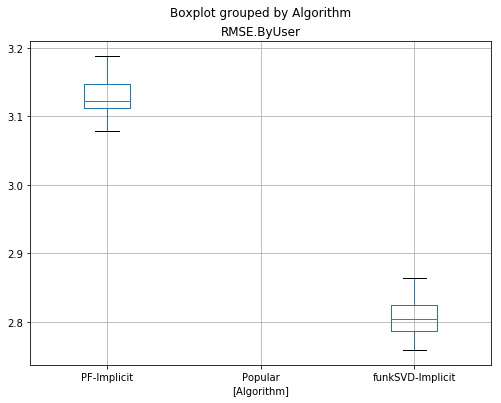

In [6]:
results.loc[:,['Algorithm', 'RMSE.ByUser']].boxplot(by='Algorithm', figsize=(8,6))

## Next up: nDCG

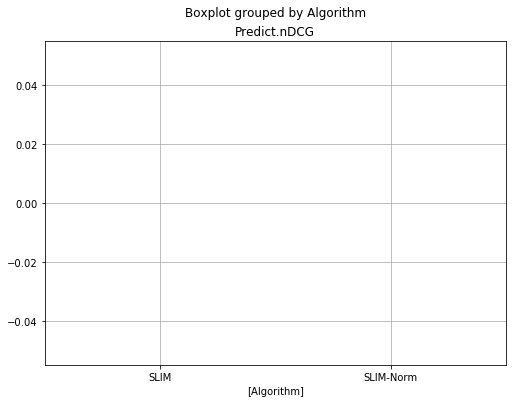

In [11]:
results.loc[:,['Algorithm', 'Predict.nDCG']].boxplot(by='Algorithm', figsize=(8,6))

## the build and test times.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd605ca58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd5fca748>], dtype=object)

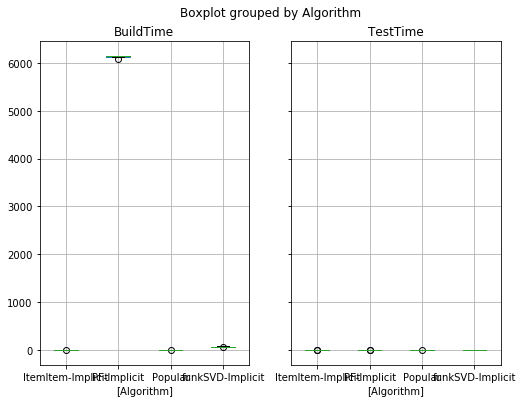

In [7]:
results.loc[:,['Algorithm', 'BuildTime', 'TestTime']].boxplot(by='Algorithm', figsize=(8,6))

## MRR

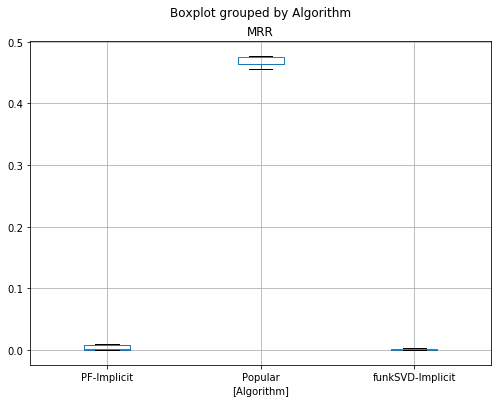

In [7]:
results.loc[:,['Algorithm', 'MRR']].boxplot(by='Algorithm', figsize=(8,6))

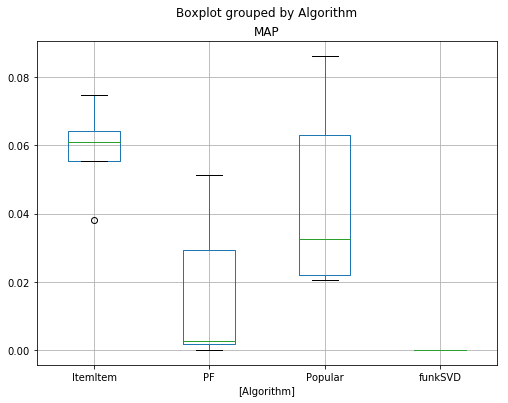

In [5]:
results.loc[:,['Algorithm', 'MAP']].boxplot(by='Algorithm', figsize=(8,6))

## Precison

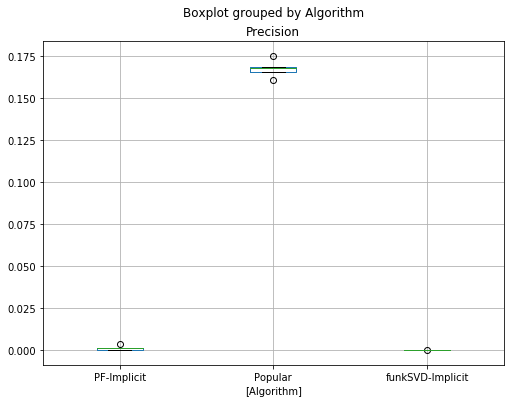

In [8]:
results.loc[:,['Algorithm', 'Precision']].boxplot(by='Algorithm', figsize=(8,6))

## Recall

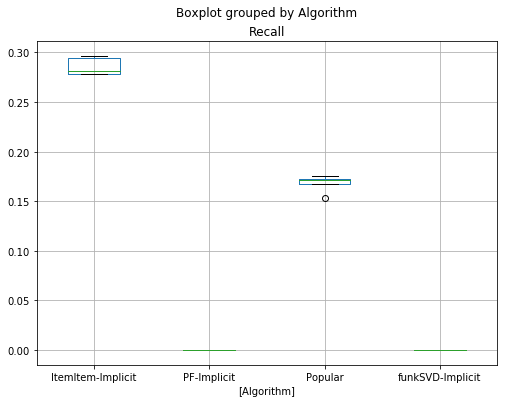

In [9]:
results.loc[:,['Algorithm', 'Recall']].boxplot(by='Algorithm', figsize=(8,6))

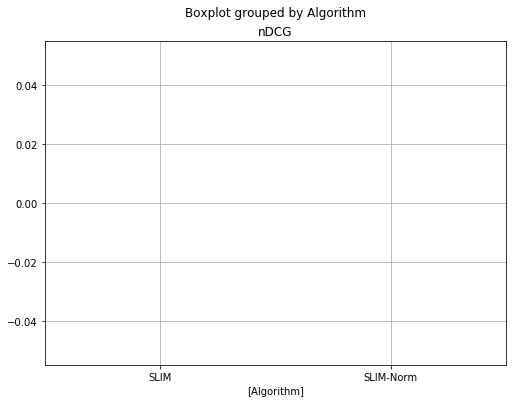

In [15]:
results.loc[:,['Algorithm', 'nDCG']].boxplot(by='Algorithm', figsize=(8,6))